### **Species**

### *Importing liberies**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Data Loading**

In [84]:
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **Data Exploring**

In [85]:
df1.shape

(150, 5)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### **Data Cleaning**

In [88]:
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [89]:
df1.duplicated().sum()

np.int64(1)

In [90]:
df1.drop_duplicates(inplace=True)

In [91]:
df1.duplicated().sum()

np.int64(0)

### **Data Visulatization**

<Figure size 1200x800 with 0 Axes>

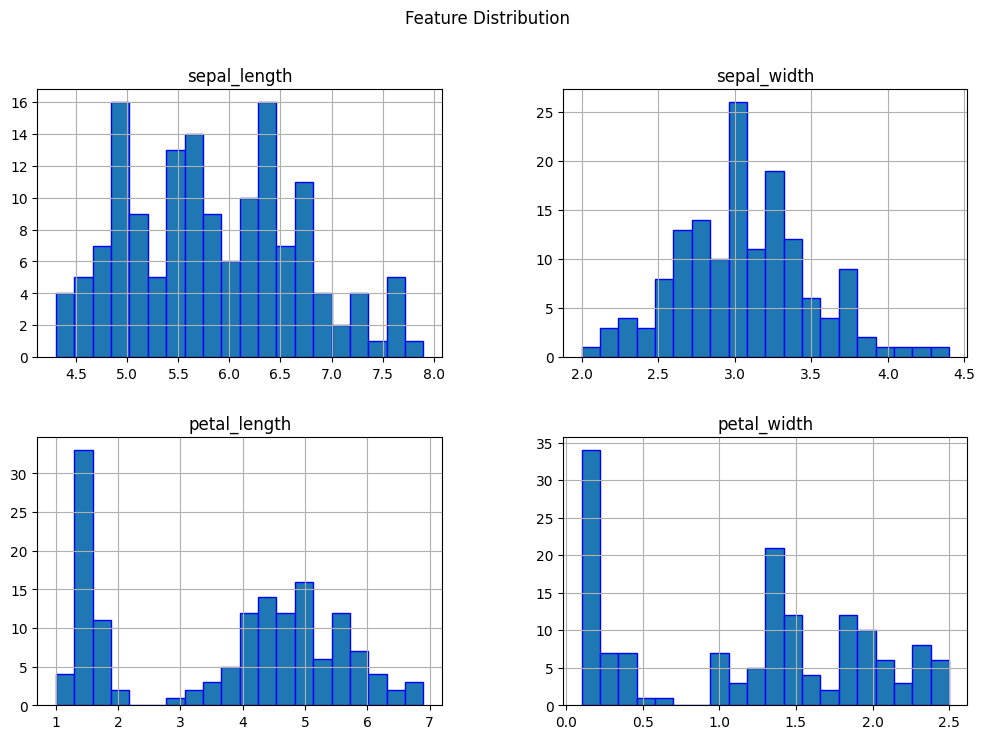

In [92]:
plt.figure(figsize=(12,8))
df1.hist(figsize=(12,8),bins=20,edgecolor='b')
plt.suptitle('Feature Distribution')
plt.show()

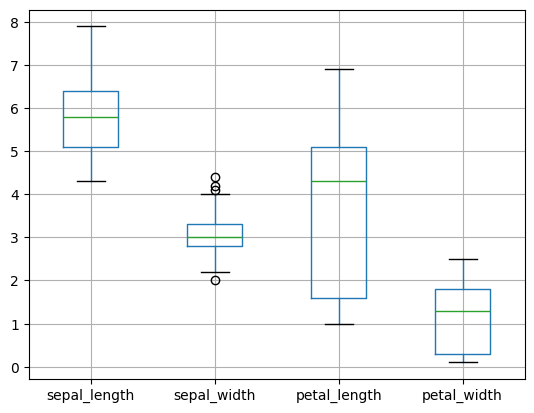

In [93]:
df1.boxplot()
plt.show()

In [95]:
def find_outlier(df, columns):
    
    outlier_indices = set()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        LF = Q1 - 1.5 * IQR
        UF = Q3 + 1.5 * IQR
        
        outlier = df[(df[column] < LF) | (df[column] > UF)]
        
        outlier_indices.update(outlier.index)
        
    return df.loc[list(outlier_indices)]

col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
outlier_df = find_outlier(df1, col)
print(outlier_df)

    sepal_length  sepal_width  petal_length  petal_width     species
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
15           5.7          4.4           1.5          0.4      setosa


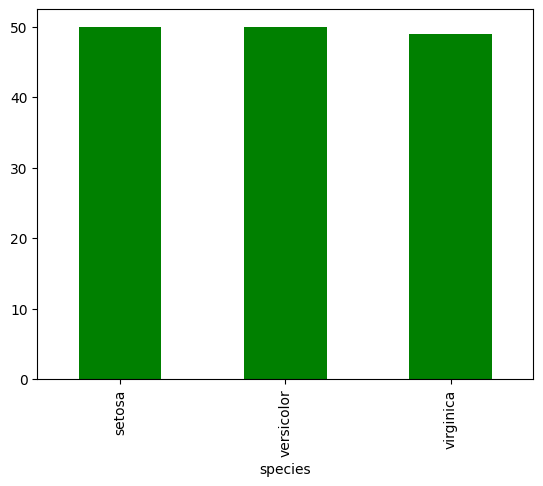

In [ ]:
df1['species'].value_counts().plot(kind='bar',color='g')
plt.show()

In [ ]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

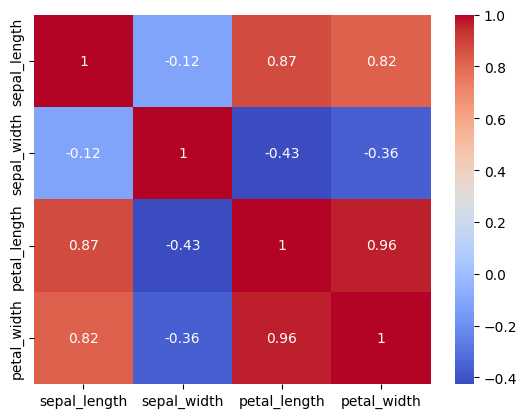

In [ ]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]
corr = df1[col].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### **Model building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df1.drop('species', axis=1)
y = df1['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

### **Model Evalation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy :{accuracy}")

Accuracy :100.0


### **Predicting Data**

In [ ]:
 new_data = [[6, 4, 9, 5]]
 predication = model.predict(new_data)
 predication[0]

'virginica'